# Take Home Challenge - Relax Inc.

The data is available as two attached CSV files:

* takehome_user_engagement.csv
* takehome_users.csv

The data has the following two tables:

1) A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:
* <b>name:</b> the user's name
* <b>object_id:</b> the user's id
* <b>email:</b> email address
* <b>creation_source:</b> how their account was created. This takes on one
of 5 values:
   * <b>PERSONAL_PROJECTS:</b> invited to join another user's personal workspace
   * <b>GUEST_INVITE:</b> invited to an organization as a guest (limited permissions)
   * <b>ORG_INVITE:</b> invited to an organization (as a full member)
   * <b>SIGNUP:</b> signed up via the website
   * <b>SIGNUP_GOOGLE_AUTH:</b> signed up using Google
Authentication (using a Google email account for their login
id)
* <b>creation_time:</b> when they created their account
* <b>last_session_creation_time:</b> unix timestamp of last login
* <b>opted_in_to_mailing_list:</b> whether they have opted into receiving
marketing emails
* <b>enabled_for_marketing_drip:</b> whether they are on the regular
marketing email drip
* <b>org_id:</b> the organization (group of users) they belong to
* <b>invited_by_user_id:</b> which user invited them to join (if applicable).

2) A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.

We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better -- no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [1]:
!ls

relax_data_science_challenge.pdf    takehome_user_engagement.csv
take_home_challenge_relax_inc.ipynb takehome_users.csv


In [2]:
# Import dependencies for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load files
users_file = 'takehome_users.csv'
user_engagement_file = 'takehome_user_engagement.csv'

# Use encoding = "ISO-8859-1" to avoid issue with utf-8 codec error
users_df = pd.read_csv(users_file, encoding = "ISO-8859-1")
user_eng_df = pd.read_csv(user_engagement_file, encoding = "ISO-8859-1")

In [4]:
# Checking data structure
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
# Checking data structure
users_df.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN


In [6]:
# Checking data type
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
# Checking data structure
user_eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
# Checking data structure
user_eng_df.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [9]:
# Checking data type
user_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


For this challenge, our target is to identify factors that predict user adoption. The company defines "adopted user" as a user who has logged into the product on three separate days in at least 1 seven-day period.

We can use the newly created user_eng_df to check the number of times each user had visited the service. Before that, let us first convert the timestamp into a datetime object.

In [10]:
# Converting time_stamp to datetime object
user_eng_df['time_stamp'] = pd.to_datetime(user_eng_df['time_stamp'])
user_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [11]:
# We can aggregate this information into a new DataFrame
user_eng_agg = user_eng_df.groupby('user_id').agg({'visited':np.sum, 'time_stamp':list})
user_eng_agg.head()

,visited,time_stamp
user_id,,
1,1,[2014-04-22 03:53:30]
2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201..."
3,1,[2013-03-19 23:14:52]
4,1,[2013-05-22 08:09:28]
5,1,[2013-01-22 10:14:20]


In [12]:
user_eng_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   visited     8823 non-null   int64 
 1   time_stamp  8823 non-null   object
dtypes: int64(1), object(1)
memory usage: 206.8+ KB


From the newly created DataFrame, we could new check if a user has logged into the product on three separate days in at least 1 seven-day period.

As for what a seven-day period is, until more clarification could be given by the company, we'll assume it means the week.

In [13]:
# Create function that checks login activity; if a user has logged into
# the product on three separate days in at least 1 seven-day period, we
# set adoption_status to True
def adoption_checker(time_list):
    # Set inital adoption_status = False
    adoption_status = False
    
    # If user visited less than 3 times overall, pass
    if len(time_list) <= 3:
        pass
    
    # Else, run main adoption checker
    else:
        ## Old routine based on arbitary time interval
        ## Compute time interval between 2 visits
        #time_diff = []
        #for i in range(1, len(time_list)):
        #    time_diff.append(time_list[i] - time_list[i-1])
        #
        ## Check for 3 consecutive visits that occurs within a seven-day interval
        ## 5 days is the maximum number of 
        #adoption_interval = []
        #
        #for i in range(len(time_diff)):
        #    if i+2 < len(time_diff):
        #        three_login_intervals = [time_diff[i].days, time_diff[i+1].days, time_diff[i+2].days]
        #        if max(three_login_intervals) <= 7:
        #            adoption_interval.append(three_login_intervals)
        #
        # If there's at least 1 
        #if len(adoption_interval) >= 1:
        #    adoption_status = True
        ## Else, not adopted
        #else:
        #    pass        
        
        # New routine based on week; also checks for multiple logins in the same day to ensure 3 separate days of visit
        # Collect week of date
        date_week = []
        for date in time_list:
            date_week.append(date.week)
        
        # Check week with largest frequency of visits and collect dates corresponding to that week
        max_freq_week = max(date_week, key=date_week.count)
        date_list = []
        for date in time_list:
            if date.week == max_freq_week:
                date_list.append(date.date())

        # If there's three separate days in set, set adoption_status = True
        if len(set(date_list)) >= 3:
            adoption_status = True
        else:
            pass
        
    return adoption_status

In [14]:
# Use function on user_eng_agg to create 'adopted' column
user_eng_agg['adopted'] = user_eng_agg['time_stamp'].apply(adoption_checker)
user_eng_agg.head()

,visited,time_stamp,adopted
user_id,,,
1,1,[2014-04-22 03:53:30],False
2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",True
3,1,[2013-03-19 23:14:52],False
4,1,[2013-05-22 08:09:28],False
5,1,[2013-01-22 10:14:20],False


In [15]:
# Checking data structure
user_eng_agg.tail()

,visited,time_stamp,adopted
user_id,,,
11996,1,[2013-09-06 06:14:15],False
11997,1,[2013-01-15 18:28:37],False
11998,1,[2014-04-27 12:45:16],False
11999,1,[2012-06-02 11:55:59],False
12000,1,[2014-01-26 08:57:12],False


In [16]:
# Reset index and preparing it for left join with DataFrame with user data: users_df
user_eng_agg = user_eng_agg.reset_index()
user_eng_agg.head()

,user_id,visited,time_stamp,adopted
0,1,1,[2014-04-22 03:53:30],False
1,2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",True
2,3,1,[2013-03-19 23:14:52],False
3,4,1,[2013-05-22 08:09:28],False
4,5,1,[2013-01-22 10:14:20],False


In [17]:
# Rename 'user_id' to 'object_id' so that we could perform a left join on 'object_id'
user_eng_agg = user_eng_agg.rename({'user_id':'object_id'}, axis='columns')
user_eng_agg

,object_id,visited,time_stamp,adopted
0,1,1,[2014-04-22 03:53:30],False
1,2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",True
2,3,1,[2013-03-19 23:14:52],False
3,4,1,[2013-05-22 08:09:28],False
4,5,1,[2013-01-22 10:14:20],False
...,...,...,...,...
8818,11996,1,[2013-09-06 06:14:15],False
8819,11997,1,[2013-01-15 18:28:37],False
8820,11998,1,[2014-04-27 12:45:16],False
8821,11999,1,[2012-06-02 11:55:59],False


In [18]:
# Left join user_df with user_eng_agg
combined_df = users_df.merge(user_eng_agg, on='object_id', how='left')
combined_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,time_stamp,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,[2014-04-22 03:53:30],False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,[2013-03-19 23:14:52],False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,[2013-05-22 08:09:28],False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,[2013-01-22 10:14:20],False


In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  visited                     8823 non-null   float64
 11  time_stamp                  8823 non-null   object 
 12  adopted                     8823 non-null   object 
dtypes: float64(3), int64(4), object

From here, we could safely assume that are not found in 'takehome_user_engagement.csv' have not once interacted with the product (i.e. have not visited at all). Therefore, we could treat the nulls as False in 'adopted' and 0 in 'visited'. As for 'invited_by_user_id', we could simply treat the null as 0 as they are no user_id 0 to begin with.

In [20]:
# Filling nulls in 'adopted', 'visited', and 'invited_by_user_id'
combined_df['adopted'] = combined_df['adopted'].fillna(False)
combined_df['visited'] = combined_df['visited'].fillna(0)
combined_df['invited_by_user_id'] = combined_df['invited_by_user_id'].fillna(0)

In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  visited                     12000 non-null  float64
 11  time_stamp                  8823 non-null   object 
 12  adopted                     12000 non-null  bool   
dtypes: bool(1), float64(3), int64(4

Of all the columns found in the DataFrame, I believe the following columns to be columns of interest: 'object_id', 'creation_time', 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'visited', and 'adopted'.

Consider we already have 'object_id' to be used as an identifier for each user, the columns 'name' and 'email' would be redundant. 'last_session_creation_time' is just the unix timestamp for the latest login information, which is a redundancy to 'time_stamp', but we don't need 'time_stamp' either since we could track the number of logins using 'visited' instead. Before we drop these columns, we'll touch base on one more column.

Although we have yet touched on 'creation_time', this date might be of interest as the time found could indicate what was going on with the product during that time (e.g. there was a promotional period, a major update/bug, etc. that might affect user activity). For this, we'll just extract the year and month of which the account was created and make a new column called 'creation_year' and 'creation_month'.

In [22]:
# Convert 'creation_time' from object to datetime object
combined_df['creation_time'] = pd.to_datetime(combined_df['creation_time'])

In [23]:
# Create 'creation_year' from 'creation_time'
combined_df['creation_year'] = combined_df['creation_time'].dt.year
combined_df['creation_month'] = combined_df['creation_time'].dt.month

In [24]:
combined_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,time_stamp,adopted,creation_year,creation_month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,[2014-04-22 03:53:30],False,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",True,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,[2013-03-19 23:14:52],False,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,[2013-05-22 08:09:28],False,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,[2013-01-22 10:14:20],False,2013,1


With 'creation_year' and 'creation_month', we could drop 'creation_time' and construct our new DataFrame.

In [25]:
columns_of_interest = ['object_id', 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
                       'org_id', 'invited_by_user_id', 'visited', 'adopted', 'creation_year','creation_month']
df = combined_df[columns_of_interest].set_index('object_id')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          12000 non-null  float64
 5   visited                     12000 non-null  float64
 6   adopted                     12000 non-null  bool   
 7   creation_year               12000 non-null  int64  
 8   creation_month              12000 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(1)
memory usage: 855.5+ KB


We'll one-hot encode our categorical data using pd.get_dummies with drop_first=True.

In [27]:
# One-hot encode DataFrame
df = pd.get_dummies(df, drop_first=True)

In [28]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted,creation_year,creation_month,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,,,
1,1,0,11,10803.0,1.0,False,2014,4,0,0,0,0
2,0,0,1,316.0,14.0,True,2013,11,1,0,0,0
3,0,0,94,1525.0,1.0,False,2013,3,1,0,0,0
4,0,0,1,5151.0,1.0,False,2013,5,0,0,0,0
5,0,0,193,5240.0,1.0,False,2013,1,0,0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  12000 non-null  float64
 4   visited                             12000 non-null  float64
 5   adopted                             12000 non-null  bool   
 6   creation_year                       12000 non-null  int64  
 7   creation_month                      12000 non-null  int64  
 8   creation_source_ORG_INVITE          12000 non-null  uint8  
 9   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 10  creation_source_SIGNUP              12000 non-null  uint8  
 11  creation_source_SIGNUP_GOOGLE_AUTH  12000

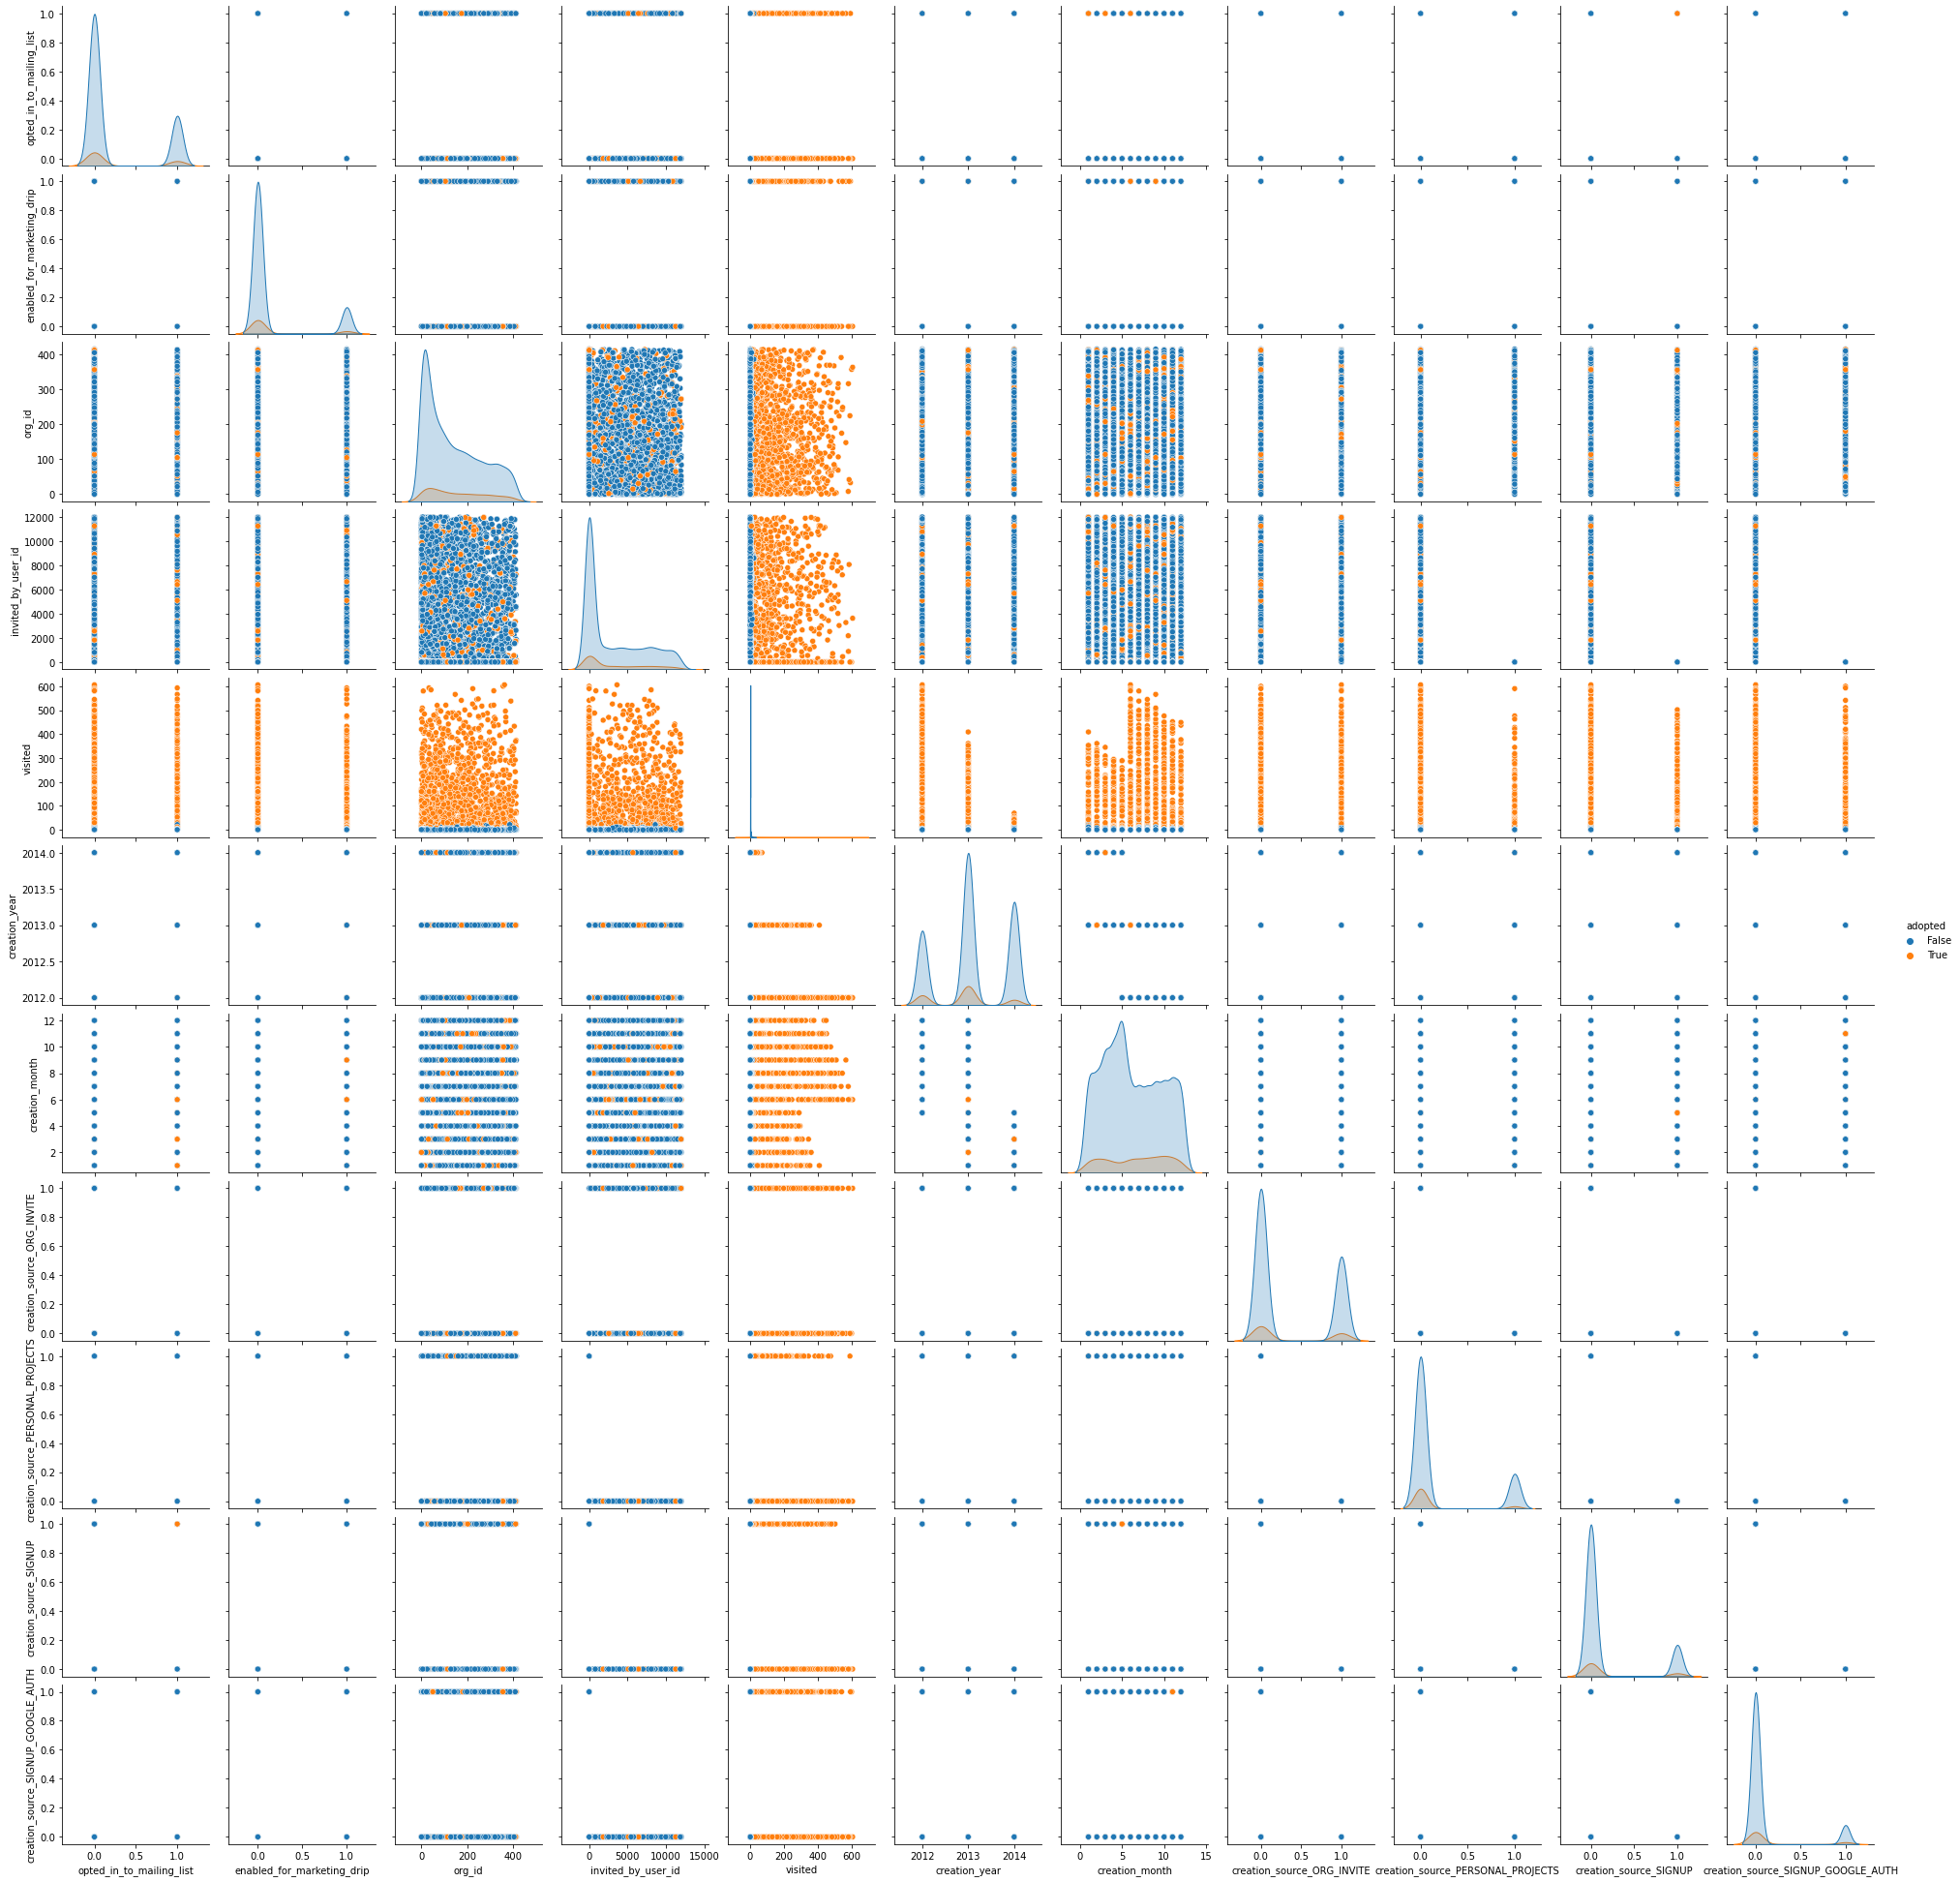

In [30]:
# Plot pairplot of columns
sns.pairplot(df, hue='adopted')
plt.show()

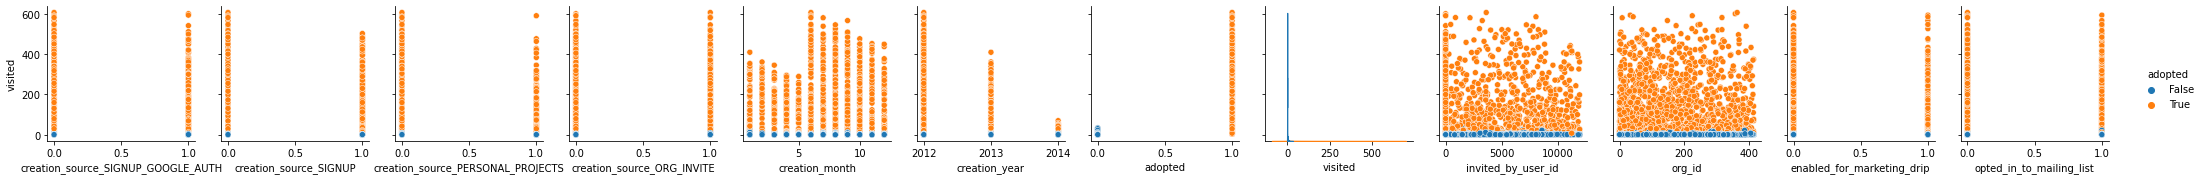

In [37]:
# Plot pairplot of visited
sns.pairplot(data=df, x_vars=df.columns[::-1], y_vars='visited', hue='adopted')
plt.show()

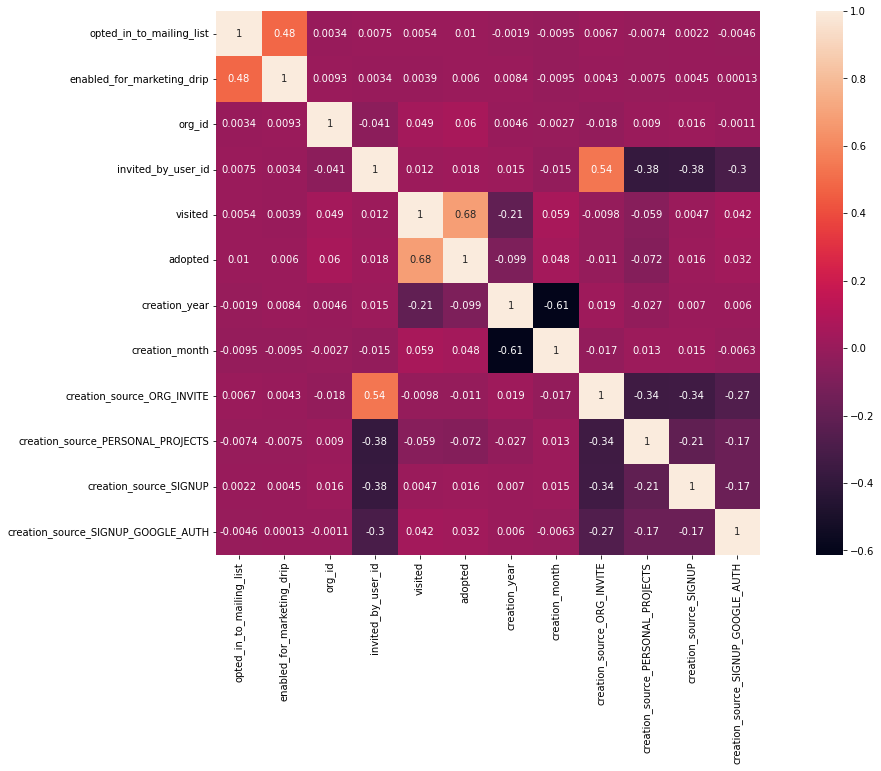

In [31]:
# Plot correlation heatmap of columns
df_corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, square=True)
plt.show()

It does make sense that the number of visits correlates to product adoption as seen from the pairplots and correlation heatmap.